> **Text 분류는 특정 문서의 분류를 학습 data를 통해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측**

- 주로 어떤 단어의 빈도 수를 통해 주제를 파악

1. **텍스트 정규화 (Text Normalization):** 텍스트 정규화는 텍스트 데이터를 일관된 형태로 만드는 과정입니다. 주요한 텍스트 정규화 기법은 다음과 같습니다:

   - **소문자 변환 (Lowercasing):** 텍스트를 모두 소문자로 변환하여 대소문자를 통일시킵니다. 이렇게 함으로써 동일한 단어가 대문자로 시작하는 경우와 소문자로 시작하는 경우를 동일하게 취급할 수 있습니다.
   
   - **불용어 제거 (Stopword Removal):** 자주 등장하지만 의미를 가지지 않는 단어들을 제거합니다. 예를 들어 'the', 'is', 'and' 등의 단어는 대부분의 문장에서 빈번하게 등장하지만 분류 작업에는 큰 도움이 되지 않으므로 제거됩니다.
   
   - **특수 문자 제거 (Removing Special Characters):** 문장에서 의미를 가지지 않는 특수 문자나 기호들을 제거합니다. 이는 텍스트의 가독성을 높이고 모델이 단어를 올바르게 인식할 수 있도록 돕습니다.
   
   - **토큰화 (Tokenization):** 문장을 단어 또는 문장 단위로 분할하여 토큰으로 만듭니다. 이를 통해 문장을 단어 단위로 처리할 수 있게 됩니다.

2. **피처 벡터화 (Feature Vectorization):** 텍스트 데이터를 숫자 형태의 벡터로 변환하는 과정입니다. 이는 모델이 텍스트 데이터를 이해하고 처리할 수 있도록 합니다. 주요한 피처 벡터화 기법은 다음과 같습니다:

   - **Bag of Words (BoW):** 문서 내 단어의 출현 빈도를 기반으로 단어를 표현하는 방법입니다. 각 문서를 벡터로 표현하고, 각 단어의 출현 빈도를 벡터의 원소로 사용합니다.
   
   - **TF-IDF (Term Frequency-Inverse Document Frequency):** 단어의 상대적인 중요도를 나타내는 수치입니다. TF는 단어의 출현 빈도를 나타내며, IDF는 단어의 문서 내 빈도와 문서 간 빈도를 고려하여 가중치를 부여합니다.
   
   - **Word Embeddings:** 단어를 밀집된 고차원 벡터로 표현하는 방법입니다. 이 방법은 단어 간의 의미적 유사성을 고려하여 단어를 벡터로 표현합니다.

텍스트 정규화와 피처 벡터화를 적용하면 모델이 텍스트 데이터를 이해하고 분류할 수 있는 형태로 데이터를 준비할 수 있습니다.

In [3]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 156)

In [4]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [12]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

- 제목, 소속, 이메일 주소 등의 헤더는 뉴스 그룹 분류의 target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많기에 제거한다.

- 순수한 text만으로 구성된 기사 내용으로 어떤 뉴스 그룹에 속하는 지 분류

In [15]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


> **피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**

- default값으로만 전처리를 한 경우

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectorization으로 feature extraction 변환 수행.
cnt_vect = CountVectorizer()

cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [19]:
# count 기반
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.617


In [20]:
# tf- idf 기반
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.678


> 텍스트 분석에서 머신러닝 모델의 성능을 향상시키는 2가지 방법
1. 최적의 ML알고리즘 선택
2. 최상의 피처 전처리 수행

- 다양한 parameter를 적용한 tfidf 벡터화

In [21]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


> GridSearchCV를 이용한 로지스틱 회귀 하이퍼 파라미터 최적화

- 로지스틱 회귀의 C 매개변수 : 규제(regularization)의 강도를 조절하는 하이퍼파라미터
- 규제는 모델의 복잡도를 조절하여 과적합(overfitting)을 방지하고 일반화 성능을 향상시키는데 사용됨
- C 값이 작을수록 규제의 강도가 강해지며, 모델은 더 간단한 결정 경계를 찾게 됩니다. 반대로 C 값이 클수록 규제의 강도가 약해지며, 모델은 학습 데이터에 더 잘 적합될 수 있습니다.

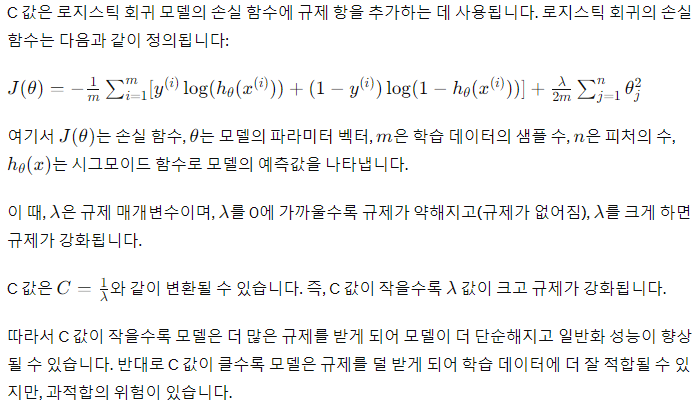

In [22]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.704


> **사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합**

- 피쳐 벡터화와 ML알고리즘 학습 / 예측을 위한 코드 작성을 한 번에 진행 가능

- 데이터의 전처리와 머신러닝 학습 과정을 통일된 api 기반에서 처리할 수 있어 더 직관적인 ML 모델 코드를 생성 가능

In [24]:
# pipeline 사용 예시
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words = 'english')), ('lr_clf', LogisticRegression(random_state = 156))])

In [25]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음.
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능.
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.690


> GridSearchCV의 생성 파라미터로 Pipeline을 입력해주면, pipeline 기반에서도 하이퍼 파라미터 튜닝이 가능하다.

In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될
# 파라미터/하이퍼 파라미터 이름과 값을 설정. .
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1, 5, 10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)} 0.7550828826229531
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.702
